In [4]:
import networkx as nx
import numpy as np
import warnings
from networkx.algorithms.community import k_clique_communities
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
import csv
import pandas as pd
import operator
import community as community
import random
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics.SIRModel as sir
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend 
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [5]:
G=nx.read_edgelist('hero-network.csv', delimiter=';', nodetype=str, encoding="utf-8")
marvel_movie = marvel_movie = open("marvel_movie.txt", "r")
marvel_movie = marvel_movie.read().split(' ;\n')
G_copy = G.copy()
G_movie = G_copy.subgraph(marvel_movie)

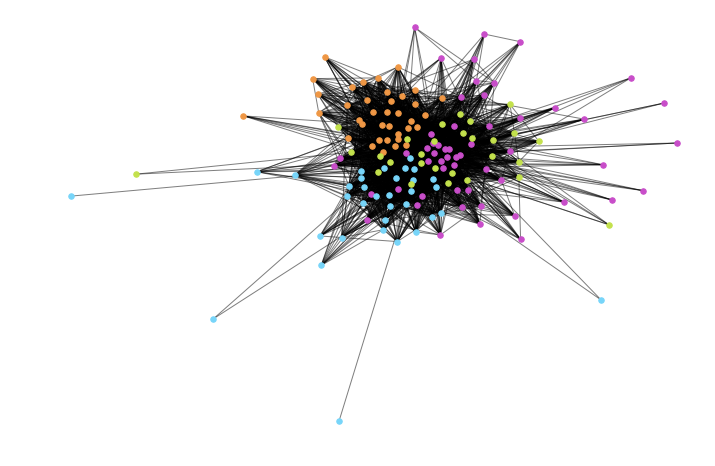

In [6]:
seed = 4
random.seed(seed)
np.random.seed(seed)
partition = community.best_partition(G_movie,random_state=seed)
labels = set(partition.values())
community_counts = {i: list(partition.values()).count(i) for i in labels}
community_counts
colormap = np.array(["#ef9745","#c84dc9" , "#77d5f9", "#c3e14c"])


plt.figure(figsize=(12,8))
pos = nx.spring_layout(G_movie,seed=seed)

count = 0
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G_movie, pos, list_nodes, node_size = 30, node_color = colormap[count])
    count = count + 1

nx.draw_networkx_edges(G_movie, pos, alpha=0.5)
plt.axis('off')
plt.show()

In [7]:
 dead = ['IRON MAN/TONY STARK','QUICKSILVER/PIETRO M','VISION','IRON MAN IV/JAMES R.'
         ,'LOKI [ASGARDIAN]','ULTRON','JARVIS, EDWIN','BLACK WIDOW/NATASHA','GUDRUN [ASGARDIAN]','ODIN [ASGARDIAN]',
        'ODIN [ASGARDIAN]','HOGUN [ASGARDIAN]','HELA [ASGARDIAN]','CASE, COL. PRESTON','HEIMDALL [ASGARDIAN]',
        'THANOS','BALDER [ASGARDIAN]']
G_movie_2 = G_movie.copy()
G_movie_2.remove_nodes_from(dead)

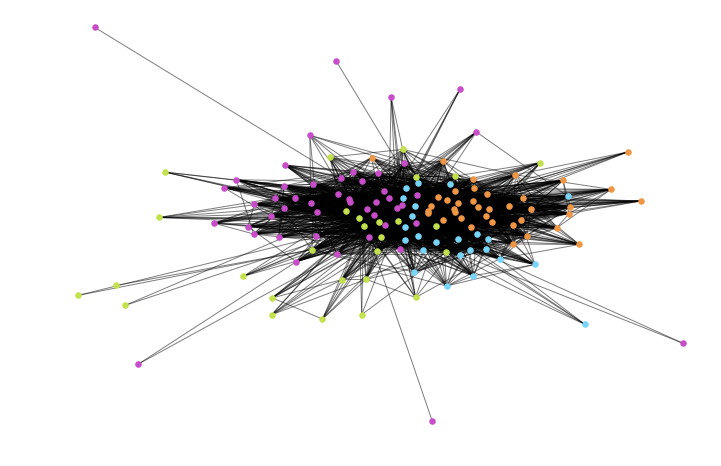

In [8]:
seed = 3
random.seed(seed)
np.random.seed(seed)
partition = community.best_partition(G_movie_2,random_state=seed)
labels = set(partition.values())
community_counts = {i: list(partition.values()).count(i) for i in labels}
community_counts
colormap = np.array(["#ef9745","#c84dc9" , "#77d5f9", "#c3e14c"])


plt.figure(figsize=(12,8))
pos = nx.spring_layout(G_movie,seed=seed)

count = 0
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G_movie_2, pos, list_nodes, node_size = 30, node_color = colormap[count])
    count = count + 1

nx.draw_networkx_edges(G_movie_2, pos, alpha=0.5)
plt.axis('off')
plt.show()

In [9]:
df = pd.read_csv('/Users/bedanian/Desktop/Network Analytics/Networks/Midterm/marvel-wikia-data.csv')

In [10]:
a = list(df['name'])
b = list(G.nodes())
res = [j for i, j in zip(a, b) if fuzz.ratio(i.lower(),i.lower())>=80]

In [11]:
G_copy = G.copy()
G_remove = G_copy.subgraph(res)

In [12]:
print(nx.info(G_remove))

Name: 
Type: Graph
Number of nodes: 6421
Number of edges: 167112
Average degree:  52.0517


In [13]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man,\/Spider-Man_,Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America,\/Captain_America_,Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,Wolverine,\/Wolverine_,Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,Iron Man,\/Iron_Man_,Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor,\/Thor_,No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [14]:
process.extract('petter parker', a)

[('Peter Parker  ', 96),
 ('Peter Parker  ', 96),
 ('Peter Parker  ', 96),
 ('Peter Parker  ', 96),
 ('Peter Parker  ', 96)]

In [15]:
df.loc[df['name'] == 'Peter Parker  ']

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
148,2511,Peter Parker,\/Peter_Parker__,Secret Identity,Good Characters,Hazel Eyes,Blond Hair,Male Characters,NaN,Deceased Characters,263.0,Oct-75,1975.0
303,1904,Peter Parker,\/Peter_Parker__,Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,137.0,Dec-94,1994.0
1067,38680,Peter Parker,\/Peter_Parker__,Secret Identity,Bad Characters,White Eyes,No Hair,Male Characters,NaN,Living Characters,35.0,Jun-92,1992.0
1069,6562,Peter Parker,\/Peter_Parker__,Secret Identity,Bad Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Deceased Characters,35.0,Mar-95,1995.0
2847,28149,Peter Parker,\/Peter_Parker__,Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Deceased Characters,12.0,Feb-96,1996.0
3861,476433,Peter Parker,\/Peter_Parker__,Secret Identity,Neutral Characters,Hazel Eyes,Bald,Male Characters,NaN,Deceased Characters,8.0,Mar-95,1995.0
5011,121669,Peter Parker,\/Peter_Parker__,Secret Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,6.0,Jun-08,2008.0
7752,476435,Peter Parker,\/Peter_Parker__,Secret Identity,Bad Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Deceased Characters,3.0,Mar-95,1995.0
12034,721820,Peter Parker,\/Peter_Parker__,No Dual Identity,NaN,NaN,NaN,Male Characters,NaN,Deceased Characters,1.0,Oct-72,1972.0
15238,714290,Peter Parker,\/Peter_Parker__,No Dual Identity,NaN,NaN,NaN,Male Characters,NaN,Deceased Characters,1.0,NaN,NaN
